## An Exploration of UN data
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv.csv")
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


5.Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita.

In [64]:
"Drop the 'Value Footnotes' column"
gdp_df = gdp_df.drop(columns = "Value Footnotes")

In [65]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country','Year':'Year', 'Value':'GDP_Per_Capita'})

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [66]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [67]:
gdp_df['Year']=gdp_df['Year'].astype(str) 

gdp_df has 8219 rows and 3 columns. Data type of "Country" is object, "year" is int and "GDP_Per_Capita" is given as float. 
"Year" data type has been changed to "string".

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [68]:
gdp_df['Year'].unique()

array(['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992',
       '1991', '1990'], dtype=object)

In [69]:
gdp_df['Year'].value_counts()

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

('2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016','2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008','2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000','1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992','1991', '1990') are represented in this data set.
The number of observations per each year are between 233 to 247 and the years and the number of observations are increasing every year.

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [104]:
gdp_df['Country'].value_counts().nsmallest(1, keep ="all").index[0]

'Djibouti'

9. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_2021`.

In [94]:
gdp_2021 = gdp_df[gdp_df['Year'] == '2021'] 


In [95]:
gdp_2021.head()

,Country,Year,GDP_Per_Capita
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267
60,Africa Western and Central,2021,4698.926894
94,Albania,2021,16113.136519
128,Algeria,2021,14496.865470


10. Use `.describe()` to find the summary statistics for GDP per capita in 2021. 

In [78]:
gdp_2021['GDP_Per_Capita'].describe()

count       247.000000
mean      24478.517262
std       24601.525764
min         836.665571
25%        5996.532844
50%       15900.976581
75%       37298.776853
max      135379.291201
Name: GDP_Per_Capita, dtype: float64

11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

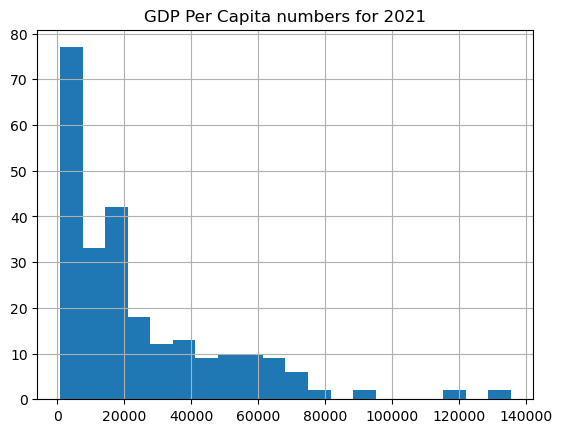

In [89]:
gdp_2021['GDP_Per_Capita'].hist(bins = 20)
plt.title('GDP Per Capita numbers for 2021');

it's kind of right skewed distribution.

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [91]:
gdp_2021.nlargest(5,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4425,Luxembourg,2021,135379.291201
6513,Singapore,2021,131864.092336
3492,Ireland,2021,118594.746862
6118,Qatar,2021,116832.570290
740,Bermuda,2021,92276.234605


In [92]:
gdp_2021.nsmallest(5,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1045,Burundi,2021,836.665571
1301,Central African Republic,2021,1128.552380
1733,Dem. Rep. Congo,2021,1313.618218
6698,Somalia,2021,1392.464262
5132,Mozambique,2021,1457.235409


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.

In [121]:
gdp_1990_2021 = gdp_df[gdp_df['Year'].isin(["1990","2021"])]
gdp_1990_2021
gdp_1990_2021['Year'].unique()
gdp_pivoted = gdp_1990_2021.pivot_table(index = "Country", columns="Year", values = "GDP_Per_Capita")


In [122]:

gdp_pivoted

Year,1990,2021
Country,,
Afghanistan,NaN,2144.166570
Africa Eastern and Southern,3386.854480,3934.287267
Africa Western and Central,3299.401375,4698.926894
Albania,5327.747458,16113.136519
Algeria,11728.545729,14496.865470
...,...,...
Virgin Islands,NaN,46893.549699
West Bank and Gaza,NaN,5663.121607
World,11207.386344,19637.823230


In [123]:
gdp_pivoted = gdp_pivoted.dropna()
gdp_pivoted

Year,1990,2021
Country,,
Africa Eastern and Southern,3386.854480,3934.287267
Africa Western and Central,3299.401375,4698.926894
Albania,5327.747458,16113.136519
Algeria,11728.545729,14496.865470
Andorra,50036.300776,59332.202910
...,...,...
Vanuatu,3101.680551,3135.836649
Viet Nam,2467.964601,12048.901994
World,11207.386344,19637.823230


14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [ ]:
gdp_pivoted["Percent_Change"] = gdp_pivoted.

15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

19. Determine the number of countries per continent. Create a bar chart showing this.

20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**.
 

22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

23. What was the first country with a life expectancy to exceed 80?

24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

25. Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

29. Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

### Bonus: Solo Exploration:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find. 

2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).